# Experiment 10

## Problem Statement

Write a program to implement Q-Learning on Frozen Lake Environment.

## Installing Dependencies

In [1]:
! pip install gymnasium

## Code: 

### Importing the Required Libraries

In [2]:
# importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pickle
import gymnasium as gym
from gymnasium.envs.toy_text.frozen_lake import generate_random_map

In [3]:
training = True
render = False

### Creating the Environment

In [4]:
# creating the frozen lake environment
frozen_lake_environment = gym.make(
    'FrozenLake-v1', map_name="4x4", is_slippery=True, render_mode='human' if render else None)

In [5]:
# action space of the frozen lake environment
environment_action_space = frozen_lake_environment.action_space
print("Action space:", environment_action_space)

# observation space of the frozen lake environment
environment_observation_space = frozen_lake_environment.observation_space
print("Observation space:", environment_observation_space)

Action space: Discrete(4)
Observation space: Discrete(16)


### Implementing the Q-learning Algorithm

#### Creating/Loading the Q-table

In [6]:
if (training):
    # creating the Q table for the frozen lake environment
    q_table = np.zeros((environment_observation_space.n,
                        environment_action_space.n))
    print("Q table size:", q_table.shape)
    print("Q table:", q_table)
else:
    # loading the Q table from the file
    q_table = pickle.load(open("q_table.pkl", "rb"))
    print("Q table size:", q_table.shape)
    print("Q table:", q_table)

Q table size: (16, 4)
Q table: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


#### Setting the Hyperparameters

In [7]:
# specifying the hyperparameters

# number of episodes
total_episodes = 10000

# maximum number of steps per episode
maximum_steps_per_episode = 100

# learning rate
learning_rate = 0.9

# discounting rate
discounting_rate = 0.9

# exploration rate
exploration_rate = 1.0

# maximum exploration rate
maximum_exploration_rate = 1.0

# minimum exploration rate
minimum_exploration_rate = 0.01

# exploration rate decay
exploration_rate_decay = 0.001

#### Applying the Q-learning Algorithm

In [8]:
rewards_per_episode = np.zeros(total_episodes)
for i in range(total_episodes):
    # reset the environment to get the initial state
    state = frozen_lake_environment.reset()[0]
    terminal_state = False  # initialize the terminal state to False
    truncated = False  # initialize the truncate to False

    while (not terminal_state and not truncated):
        if (training and np.random.random() < exploration_rate):
            # choose an action randomly
            action = frozen_lake_environment.action_space.sample()
        else:
            # choose the action with the highest Q value for the current state
            action = np.argmax(q_table[state, :])

        # choose an action

        new_state, reward, terminal_state, truncated, prob = frozen_lake_environment.step(
            action)

        if (training):
            q_table[state, action] = q_table[state, action] + learning_rate * \
                (reward + discounting_rate *
                 np.max(q_table[new_state, :]) - q_table[state, action])

        state = new_state

    exploration_rate = max(exploration_rate - exploration_rate_decay, 0)

    if (exploration_rate == 0):
        learning_rate = 0.0001

    if (reward == 1):
        rewards_per_episode[i] = 1

frozen_lake_environment.close()

In [9]:
# save the Q table if training
if (training):
    with open("q_table.pkl", "wb") as file:
        pickle.dump(q_table, file)

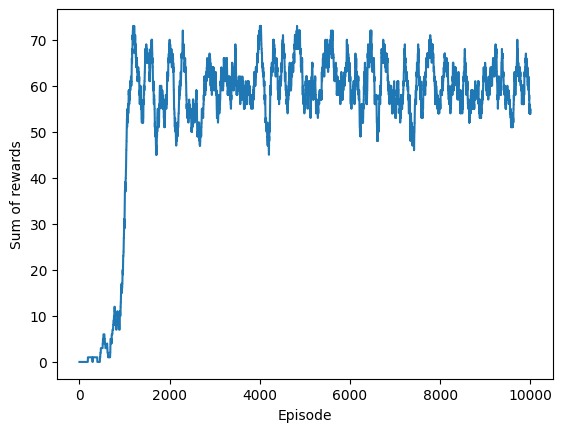

In [10]:
sum_of_rewards = np.zeros(total_episodes)
for i in range(total_episodes):
    sum_of_rewards[i] = np.sum(rewards_per_episode[max(0, i-100):i+1])

plt.plot(sum_of_rewards)
plt.xlabel("Episode")
plt.ylabel("Sum of rewards")
plt.show()